# Pre-tutorial on Python for Digital Image Processing

This short Python tutorial introduces some general functions and practices needed for making the programming assignments for the Digital Image Processing course, like reading and displaying images. Please note that this notebook has been modified from [1].

### Setting up the environment 

First, we need to import a basic modules for reading and plotting images, and manipulating arrays:

In [1]:
import matplotlib.pylab as plt # plotting package
from skimage import io         # utilities to read and write images in various formats
import numpy as np             # array manipulation package

(Note: If you need to familiarise yourself with arrays, please refer to the NumPy pre-tutorial.)

Run magic command `%matplotlib inline` in order to display the graphics inline:

In [2]:
%matplotlib inline

Set the default size of figures in the notebook (unless otherwise specified):

In [3]:
plt.rcParams['figure.figsize'] = (10, 5) # width and height

### Reading and plotting an image

Read an RGB image and display some of its properties:

In [4]:
img = io.imread('mandril.png')

# variable type
print 'variable type:', type(img)

# data type
print 'data type:', img.dtype    

# print array shape/dimensions
print 'array shape:', img.shape  

# print number of array dimensions
print 'number of dimensions:', img.ndim  

# print number of elements in the array.
print 'number of elements:', img.size  

variable type: <type 'numpy.ndarray'>
data type: uint8
array shape: (512, 512, 3)
number of dimensions: 3
number of elements: 786432


Plot the image:

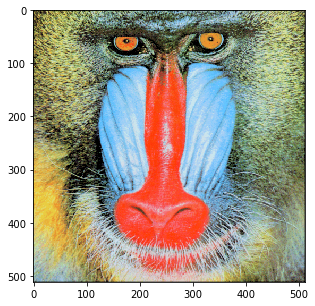

In [5]:
fig, ax = plt.subplots() # create figure
ax.imshow(img); # display image

The axes are useful in many cases but they can be also disabled:

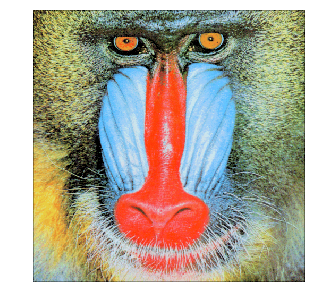

In [6]:
fig, ax = plt.subplots()
ax.imshow(img)
ax.axis('off'); # disable axes

In general, it is also good to give titles to images, especially if there are several subplots in the figure:

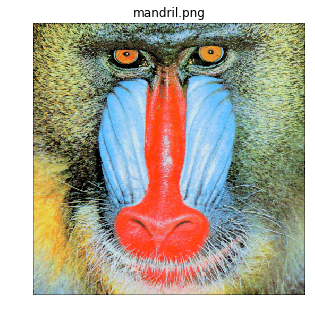

In [7]:
fig, ax = plt.subplots()
ax.imshow(img)
ax.set_title('mandril.png') # set title
ax.axis('off');

It is also possible to override the default figure size if needed:

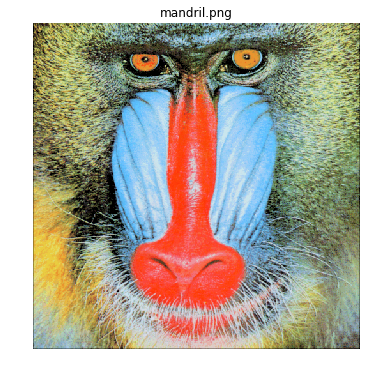

In [8]:
fig, ax = plt.subplots(figsize=(10,6)) # create figure with custom size
ax.imshow(img)
ax.set_title('mandril.png')
ax.axis('off');

Subplots are often requested while making the assignments. Let's plot the different color channels of the RGB image (sliced array), in the same figure:

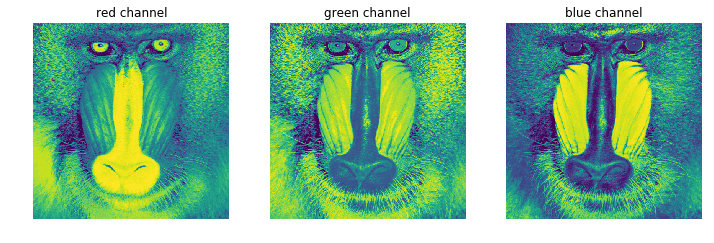

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=3) # create figure with 1x3 subplots
ax[0].imshow(img[:,:,0]) # take the first channel which corresponds to red
ax[0].set_title('red channel')
ax[0].axis('off')
ax[1].imshow(img[:,:,1]) # take the second channel which corresponds to green
ax[1].set_title('green channel')
ax[1].axis('off')
ax[2].imshow(img[:,:,2]) # take the third channel which corresponds to blue
ax[2].set_title('blue channel') 
ax[2].axis('off');
fig.tight_layout() # automatically adjusts subplot params so that the subplots fit into the figure area

The default colormap lookup table (LUT) is `viridis`, thus the intensities of the single channels are shown in pseudocolor. The colormap for each subplot can be separately switched into grayscale: 

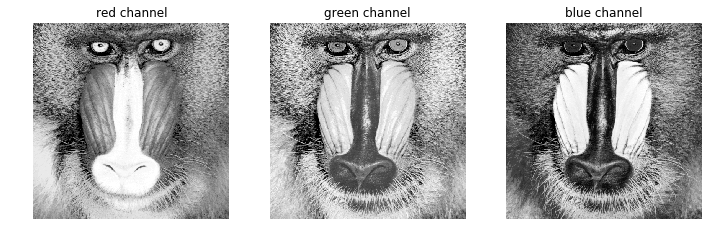

In [10]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(img[:,:,0], cmap=plt.get_cmap('gray')) # set colormap to gray
ax[0].set_title('red channel')
ax[0].axis('off')
ax[1].imshow(img[:,:,1], cmap=plt.get_cmap('gray')) # set colormap to gray
ax[1].set_title('green channel')
ax[1].axis('off')
ax[2].imshow(img[:,:,2], cmap=plt.get_cmap('gray')) # set colormap to gray
ax[2].set_title('blue channel')
ax[2].axis('off');
fig.tight_layout()

Or one can simply change the default colormap into `gray`:

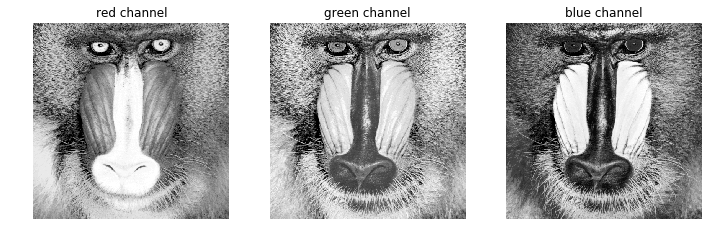

In [11]:
plt.rcParams['image.cmap'] = 'gray' # set default colormap to gray

fig, ax = plt.subplots(1, 3)
ax[0].imshow(img[:,:,0])
ax[0].set_title('red channel')
ax[0].axis('off')
ax[1].imshow(img[:,:,1])
ax[1].set_title('green channel')
ax[1].axis('off')
ax[2].imshow(img[:,:,2])
ax[2].set_title('blue channel')
ax[2].axis('off');
fig.tight_layout() 

### Image data types and unexpected errors with arithmetic

Different image __[data types](http://scikit-image.org/docs/dev/user_guide/data_types.html)__ (`dtype`) are assumed to use the following ranges:
* `uint8` -> [0, 255]
* `uint16` -> [0, 65535]
* `uint32` -> [0, 232]
* `float` -> [-1, 1] or [0, 1]
* `int8` -> [-128, 127]
* `int16` -> [-32768, 32767]
* `int32` -> [-231, 231 - 1]

Therefore, image intensities should be always __[scaled](http://scikit-image.org/docs/dev/user_guide/data_types.html#rescaling-intensity-values)__ according to the data type in order to avoid unwanted distortion.

Many image processing functions e.g. in `skimage` are usually designed so that they accept any of the aforementioned data types but the returned image may be of different data type due to efficiency reasons. In `skimage`, there are utility functions for converting data types and rescaling the image intensities accordingly:
* `img_as_float` -> 64-bit floating point
* `img_as_ubyte` -> 8-bit uint
* `img_as_uint` -> 16-bit uint
* `img_as_int` -> 16-bit int

Please note that one should be very careful when using `astype` with images because it violates the aforementioned assumptions [2]:

In [12]:
from skimage import img_as_float

image = np.arange(0, 255, 50, dtype=np.uint8)

print 'astype conversion:', image.astype(np.float) # These float values are out of range.

print 'conversion with scaling:', img_as_float(image)


astype conversion: [   0.   50.  100.  150.  200.  250.]
conversion with scaling: [ 0.          0.19607843  0.39215686  0.58823529  0.78431373  0.98039216]


Data types can be a source of "unexpected errors" when performing arithmetic operations, like addition and subtraction on images. Therefore, it is crucial to understand the different data types and the corresponding value ranges when potential errors can be easily recognized.

NumPy uses modulo arithmetic on **overflow values** instead of clipping them.

img (uint8):


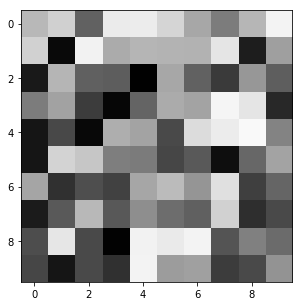

img + 100:


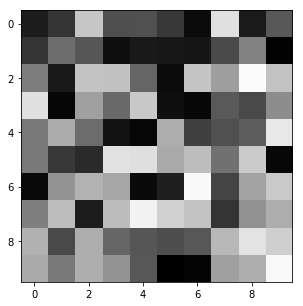

data type after addition: uint8


img (uint8):
[[184 208  98 235 236 213 167 124 182 244]
 [209   9 242 171 181 179 178 229  29 159]
 [ 25 181  96  93   1 167  97  58 151  94]
 [124 162  60   6 100 171 164 245 229  41]
 [ 21  72   8 174 163  73 220 236 249 132]
 [ 21 212 198 126 123  70  90  14 103 163]
 [165  48  78  66 166 187 149 224  63 101]
 [ 27  89 184  88 142 109  96 209  46  73]
 [ 77 230  73   2 242 234 243  84 128 107]
 [ 70  21  74  48 243 156 160  60  74 148]]


img + 100 is actually computed modulo 256, i.e. (img + 100) % 256:
[[ 28  52 198  79  80  57  11 224  26  88]
 [ 53 109  86  15  25  23  22  73 129   3]
 [125  25 196 193 101  11 197 158 251 194]
 [224   6 160 106 200  15   8  89  73 141]
 [121 172 108  18   7 173  64  80  93 232]
 [121  56  42 226 223 170 190 114 203   7]
 [  9 148 178 166  10  31 249  68 163 201]
 [127 189  28 188 242 209 196  53 146 173]
 [177  74 173 102  86  78  87 184 228 207]
 [170 121 174 148  87   0   4 160 174 248]]


img / 3 ... floats g

In [13]:
img = np.random.randint(0,255,[10,10], dtype='uint8') # 10x10 uint8 image with random values

print 'img (uint8):'
# show original
data_plot = plt.imshow(img, vmin=0, vmax=255, interpolation='None')
plt.show()

# add 100 to each pixel value 
img100 = img + 100

print 'img + 100:'
# show the resulting image
data_plot = plt.imshow(img100, vmin=0, vmax=255, interpolation='None')
plt.show()

print 'data type after addition:', img100.dtype
print '\n'

print 'img (uint8):'
print img
print '\n'
print 'img + 100 is actually computed modulo 256, i.e. (img + 100) % 256:'
print img100
print '\n'

print 'img / 3 ... floats get truncated towards zero:'
print img / 3

In order to get clipping behavior on overflow values, one can use a higher precision data types, for instance:

img (uint16):


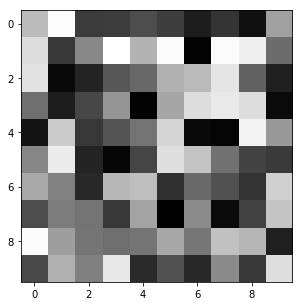

img + 100 with saturated overflow values (uint8)


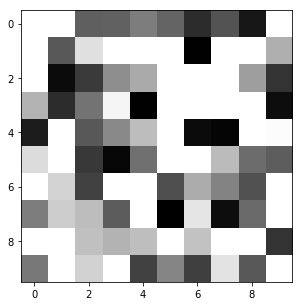

data type after addition: uint16


img (uint16):
[[187 253  59  60  77  62  29  52  16 160]
 [221  55 136 254 180 251   3 250 239 107]
 [226   9  37  87 104 177 186 229  97  33]
 [110  29  71 149   3 166 221 233 221  10]
 [ 19 203  55  84 115 213   9   5 244 153]
 [134 236  36   6  69 223 195 114  67  58]
 [168 129  41 184 190  49 105  81  51 208]
 [ 77 124 115  57 164   2 139  10  65 197]
 [252 158 117 110 116 167 118 193 181  33]
 [ 74 176 128 232  42  82  40 138  55 222]]


Note the values exceeding 255 in the resulting uint16 image (img + 100):
[[287 353 159 160 177 162 129 152 116 260]
 [321 155 236 354 280 351 103 350 339 207]
 [326 109 137 187 204 277 286 329 197 133]
 [210 129 171 249 103 266 321 333 321 110]
 [119 303 155 184 215 313 109 105 344 253]
 [234 336 136 106 169 323 295 214 167 158]
 [268 229 141 284 290 149 205 181 151 308]
 [177 224 215 157 264 102 239 110 165 297]
 [352 258 217 210 216 267 218 293 281 133]
 [174 276 228 332 142 182 140 238 155 322]]


Clipped uint

In [14]:
img = np.random.randint(0,255,[10,10], dtype='uint16') # use higher precision, i.e. uint16

print 'img (uint16):'
# show original
data_plot = plt.imshow(img, vmin=0, vmax=255, interpolation='None')
plt.show()

# add 100 to each pixel value
img100 = img + 100

# clip (saturate) resulting image and convert to uint8
img100uint8 = np.clip(img100, 0, 255).astype(np.uint8)

print 'img + 100 with saturated overflow values (uint8)'
# show resulting image
data_plot = plt.imshow(img100uint8, interpolation='None')
plt.show()

print 'data type after addition:', img100.dtype
print '\n'

print 'img (uint16):'
print img
print '\n'
print 'Note the values exceeding 255 in the resulting uint16 image (img + 100):'
print img100
print '\n'
print 'Clipped uint16 image converted into uint8 (values over range saturated into 255):'
print img100uint8
print '\n'

Note that similar "issues" occur with negative values when subtracting images.

### Unexpected errors with visualizing images with `imshow`

The operation of matplotlib's `imshow` function is rather complicated as its default interpretation of different image types varies.

In the case of `NxM` arrays of any data type, the visualized images are automatically scaled so that the full range of colors in the colormap is utilized:

single channel uint16 array:

img (uint16):


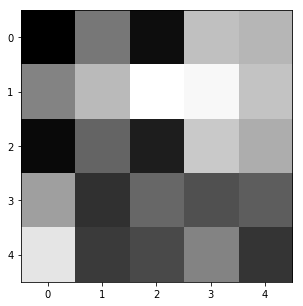

img + 100 (uint16):


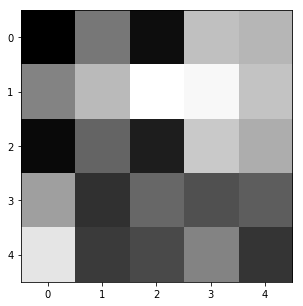

Note that the images look exactly the same despite constant bias in their value ranges:


img (uint16):
[[  9 123  22 192 183]
 [134 187 253 246 196]
 [ 18 105  37 201 174]
 [161  56 108  86  98]
 [228  65  80 135  60]]


img + 100 (uint16):
[[109 223 122 292 283]
 [234 287 353 346 296]
 [118 205 137 301 274]
 [261 156 208 186 198]
 [328 165 180 235 160]]


single channel float64 array:
img (float64):


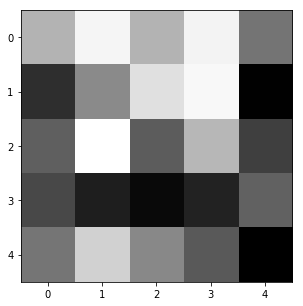

img + 1 (float64):


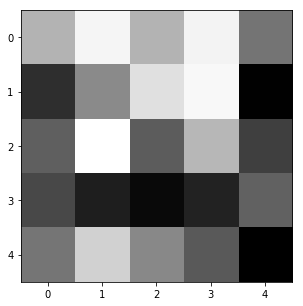

Again, the images look exactly the same despite the bias:


img (float64):
[[ 0.70747449  0.95144985  0.70160277  0.94849212  0.46332415]
 [ 0.19939932  0.54896238  0.87433324  0.96443669  0.03063723]
 [ 0.38357512  0.99210922  0.37509238  0.71878484  0.26404716]
 [ 0.29813096  0.13755135  0.06010116  0.15355837  0.39327103]
 [ 0.46746728  0.81689673  0.53990092  0.3655905   0.02316376]]


img + 1 (float64):
[[ 1.70747449  1.95144985  1.70160277  1.94849212  1.46332415]
 [ 1.19939932  1.54896238  1.87433324  1.96443669  1.03063723]
 [ 1.38357512  1.99210922  1.37509238  1.71878484  1.26404716]
 [ 1.29813096  1.13755135  1.06010116  1.15355837  1.39327103]
 [ 1.46746728  1.81689673  1.53990092  1.3655905   1.02316376]]




In [15]:
print 'single channel uint16 array:\n'

img = np.random.randint(0,255,[5,5], dtype='uint16') # 5x5 uint16 image with random values

print 'img (uint16):'
# show original
data_plot = plt.imshow(img, interpolation='None')
plt.show()

print 'img + 100 (uint16):'
# add 100 to each pixel value and show resulting image
data_plot = plt.imshow(img + 100, interpolation='None')
plt.show()

print 'Note that the images look exactly the same despite constant bias in their value ranges:'
print '\n'

print 'img (uint16):'
print img
print '\n'
print 'img + 100 (uint16):'
print img + 100
print '\n'

print 'single channel float64 array:'

img = np.random.random([5,5]) # 5x5 float64 image with random values

print 'img (float64):'
# show original
data_plot = plt.imshow(img, interpolation='None')
plt.show()

print 'img + 1 (float64):'
# add 1 to each pixel value and show resulting image
data_plot = plt.imshow(img + 1, interpolation='None')
plt.show()

print 'Again, the images look exactly the same despite the bias:'
print '\n'

print 'img (float64):'
print img
print '\n'
print 'img + 1 (float64):'
print img + 1
print '\n'

Please note that the overflow "issue" and modulo arithmetic still exist if value range of the data type is exceeded:

img (uint16):


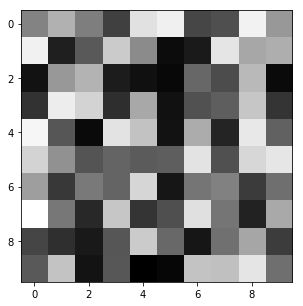

img - 100 (uint16):


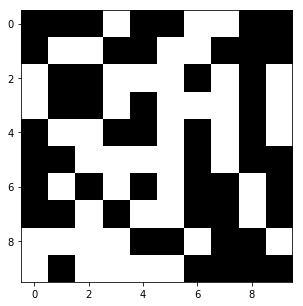

Note the result of modulo arithmetic:


img (uint16):
[[128 173 124  63 220 235  69  78 237 149]
 [236  31  88 199 136  12  26 224 164 170]
 [ 18 149 176  28  16   8 101  75 181  10]
 [ 49 232 207  45 165  17  81  92 194  52]
 [241  84  10 222 190  18 168  37 227  95]
 [208 142  83  98  89  92 223  79 210 225]
 [155  55 120  98 209  22 115 126  58 109]
 [250 117  40 194  51  78 219 115  34 166]
 [ 68  46  25  84 199 102  22 110 163  59]
 [ 88 191  19  85   0   6 191 188 224 109]]


img - 100 (uint16):
[[   28    73    24 65499   120   135 65505 65514   137    49]
 [  136 65467 65524    99    36 65448 65462   124    64    70]
 [65454    49    76 65464 65452 65444     1 65511    81 65446]
 [65485   132   107 65481    65 65453 65517 65528    94 65488]
 [  141 65520 65446   122    90 65454    68 65473   127 65531]
 [  108    42 65519 65534 65525 65528   123 65515   110   125]
 [   55 65491    20 65534   109 65458    15    26 65494     9]
 [  150    17 65476    94 65487 65514   119    15 65

In [16]:
img = np.random.randint(0,255,[10,10], dtype='uint16') # 10x10 uint16 image with random values

print 'img (uint16):'
# show original
data_plot = plt.imshow(img, interpolation='None')
plt.show()

# subtract 100 from each pixel value and show resulting image
print 'img - 100 (uint16):'
data_plot = plt.imshow(img - 100, interpolation='None')
plt.show()

print 'Note the result of modulo arithmetic:'
print '\n'

print 'img (uint16):'
print img
print '\n'
print 'img - 100 (uint16):'
print img - 100
print '\n'

`NxMx3` arrays, like RGB images, are not automatically scaled for visualization as the individual channels are assumed to be in the range of:
* `[0, 1]` for `float64` arrays
* `[0, 255]` for `uint8` arrays

Original uint8 RGB image:


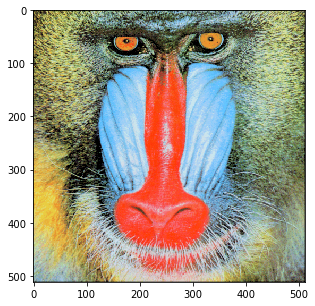

Converted to float64 without rescaling to [0,1]:


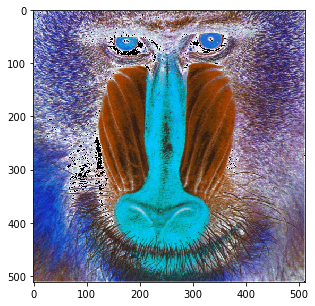

Converted to float64 with rescaling to [0,1]:


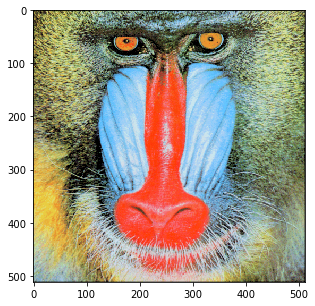

Converted from float64 back to uint8 without rescaling to [0,255]:


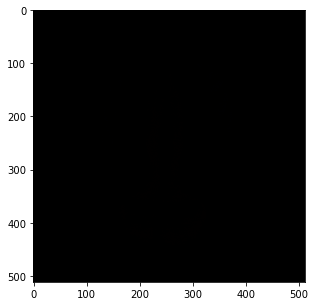

Converted from float64 back to uint8 with rescaling to [0,255]:


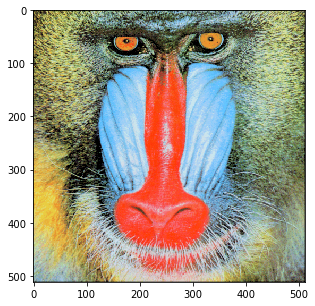

In [18]:
from skimage import img_as_ubyte

img = io.imread('mandril.png') # read uint8 RGB image

print 'Original uint8 RGB image:'
# show original
data_plot = plt.imshow(img, interpolation='None')
plt.show()

print 'Converted to float64 without rescaling to [0,1]:'
# convert to float64 using astype
data_plot = plt.imshow(img.astype(np.float), interpolation='None')
plt.show()

print 'Converted to float64 with rescaling to [0,1]:'
# convert to float64 using img_as_float
data_plot = plt.imshow(img_as_float(img), interpolation='None')
plt.show()

print 'Converted from float64 back to uint8 without rescaling to [0,255]:'
# convert to float64 using img_as_float
data_plot = plt.imshow(img_as_float(img).astype(np.uint8), interpolation='None')
plt.show()

print 'Converted from float64 back to uint8 with rescaling to [0,255]:'
# convert to float64 using img_as_float
data_plot = plt.imshow(img_as_ubyte(img_as_float(img)), interpolation='None')
plt.show()

#### References

[1] https://github.com/karinsasaki/python-workshop-image-processing/blob/master/pre_tutorial/pre-tutorial.ipynb

[2] http://scikit-image.org/docs/dev/user_guide/data_types.html